<a href="https://colab.research.google.com/github/johnjustine5646/ComputerVision_Labs_Sem3/blob/main/CV_Lab3_2348522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread(r'/content/istockphoto-1382384282-612x612.jpg', 0)

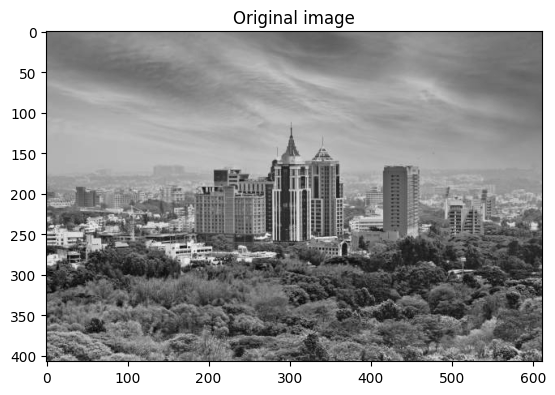

In [3]:
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.show()

## Image Negative
an image negative refers to the inversion of pixel intensity values in an image. Each pixel's intensity value is subtracted from the maximum intensity value supported by the image format. The result is a reversed or "negative" representation of the original image.

#### Negative intensity=Max intensity−Original intensity



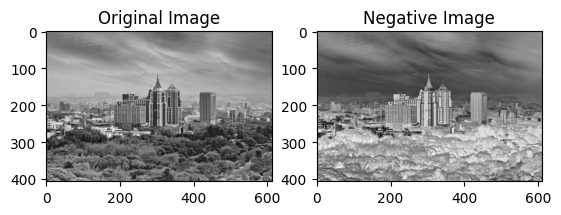

In [4]:
def image_negative(image):
    return 255 - image


negative_image = image_negative(image)
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(negative_image, cmap='gray'), plt.title('Negative Image')
plt.show()

## Gray Level Slicing

Gray-level slicing is a technique used in digital image processing to enhance or highlight specific intensity levels in an image. The basic idea is to create a binary image (black and white) based on pixel intensity values within a specified range or ranges.

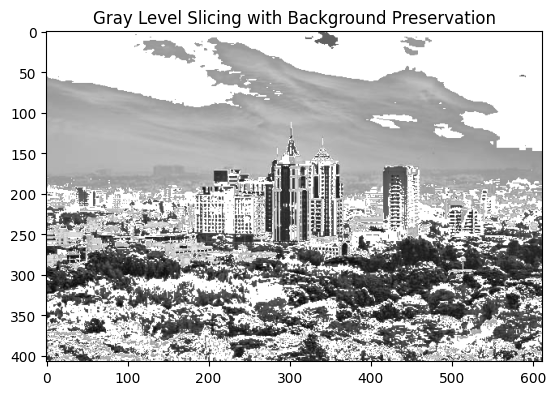

In [5]:
def gray_level_slicing_preserve(image, lower_bound, upper_bound):
    result_image = image.copy()
    result_image[(image >= lower_bound) & (image <= upper_bound)] = 255
    return result_image

sliced_image = gray_level_slicing_preserve(image, 100, 150)

plt.imshow(sliced_image, cmap='gray')
plt.title('Gray Level Slicing with Background Preservation')
plt.show()

## Histogram Equalization

Histogram equalization is a technique used in digital image processing to enhance the contrast of an image by redistributing the intensity values across the entire range. The main goal is to make the histogram of the image more uniform, thereby maximizing the utilization of the available intensity levels.


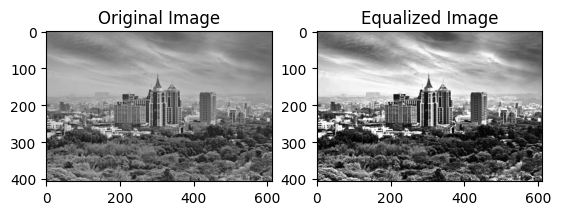

In [6]:
# Built-in

equalized_image = cv2.equalizeHist(image)

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()

## User-defined function for histogram equalization

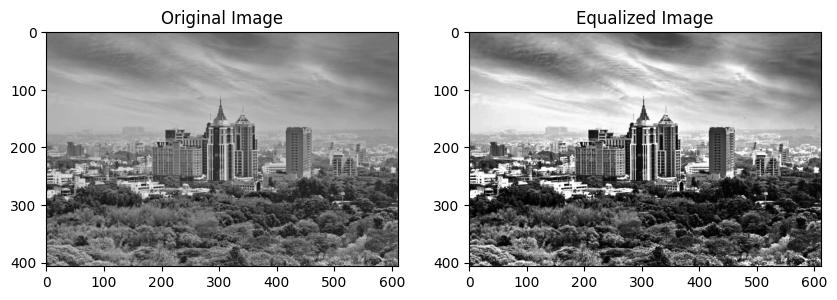

In [7]:
def histogram_equalization(image):
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

    cdf = histogram.cumsum()
    cdf_normalized = cdf * float(histogram.max()) / cdf.max()

    image_equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)

    return image_equalized.reshape(image.shape)

equalized_image = histogram_equalization(image)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()